## Diabetes Dataset 

## Steps involved in the whole process after problem statement given
1. Read Data
2. Variable Identification-- Target is the dependent variable, independent variables used for model building
3. Univariate Analysis-- Tabular method-describe() for continous ; value_counts for categorical,Graphical-histogram/Boxplot/
4. Bivariate Analysis-- For continous -continous variables-- scatter plot,corr() 
5. Missing value--Impute
6. Outlier --capping or Binning 
7. Variable Transformation-- log/standard scalar/
8. Model Building-- Regression

### Step 1: Loading Data from sklearn. We see that 13 independent variables are saved in the dataframe. Target(Price) is saved in a separate variable.There are 506 records in the dataset. To get description about the dataset we give boston.DESCR. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading the dataset
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

### Step 2: Independent features saved as numpy array by name diabetes.data and target in diabetes.target. Independent Feature names are in diabetes.feature_names

In [3]:
X,y=load_diabetes(return_X_y=True)
X.shape,y.shape

((442, 10), (442,))

In [4]:
## data divided in diabetes.data and diabetes.target
print(type(diabetes.data),'Independent Features',diabetes.data.shape,'\nTarget',diabetes.target.shape,type(diabetes.target))
# to get diabetes feature names
print(diabetes.feature_names)

<class 'numpy.ndarray'> Independent Features (442, 10) 
Target (442,) <class 'numpy.ndarray'>
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Creating a Dataframe with features and target variable. 

In [5]:
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['Dlevel']=diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Dlevel
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Step 3: Univariate analysis - .describe(), plotting histogram/boxplot taking some features

In [6]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Dlevel
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


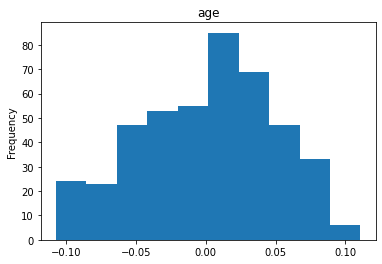

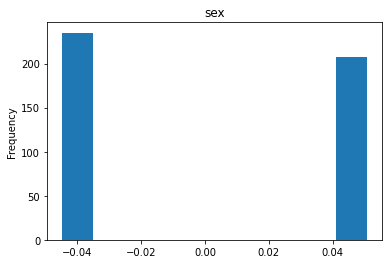

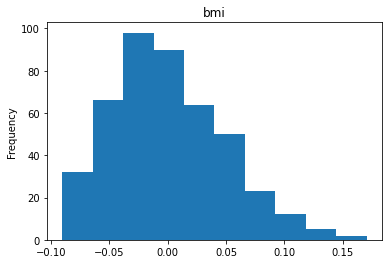

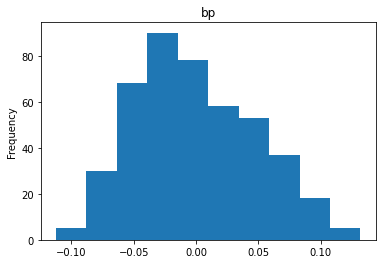

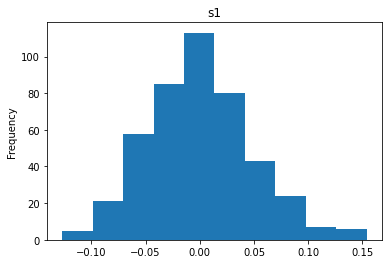

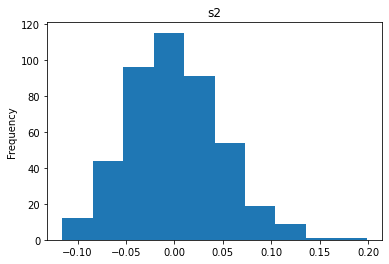

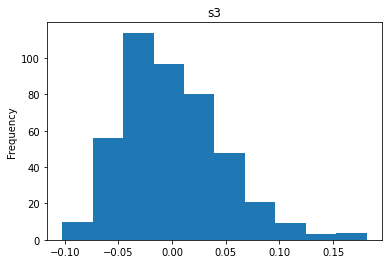

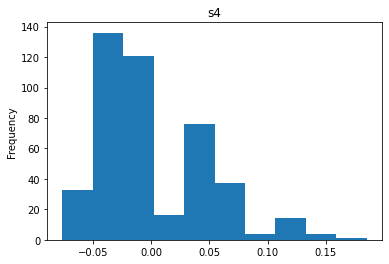

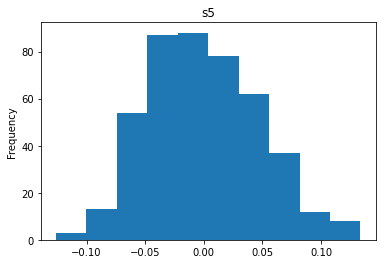

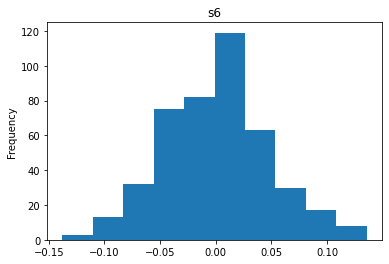

In [7]:
col=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
for i in col:
    df[i].plot.hist()
    plt.title(i)
    plt.show()

In [8]:
S1=['age', 'sex', 'bmi', 'bp']
S2=['s1', 's2', 's3', 's4', 's5', 's6']


<AxesSubplot:>

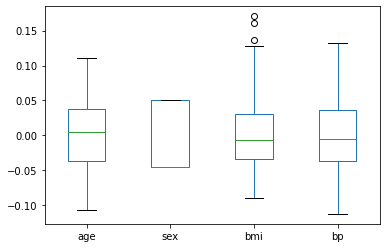

In [9]:
df[S1].plot.box()

<AxesSubplot:>

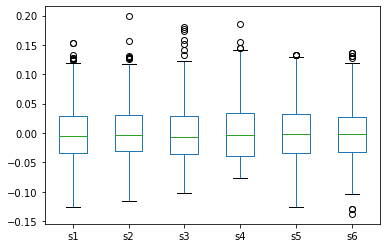

In [10]:
df[S2].plot.box()

<AxesSubplot:ylabel='Density'>

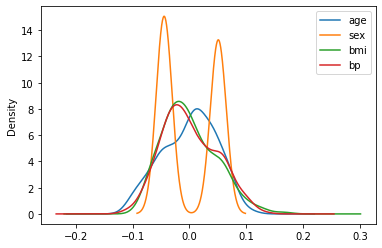

In [11]:
df[S1].plot.kde()

<AxesSubplot:ylabel='Density'>

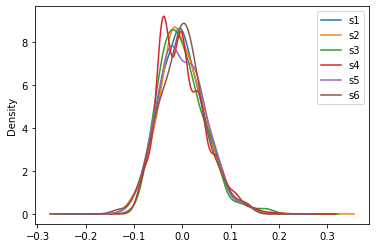

In [12]:
df[S2].plot.kde()

### Step 4: Bivariate Analysis

<AxesSubplot:>

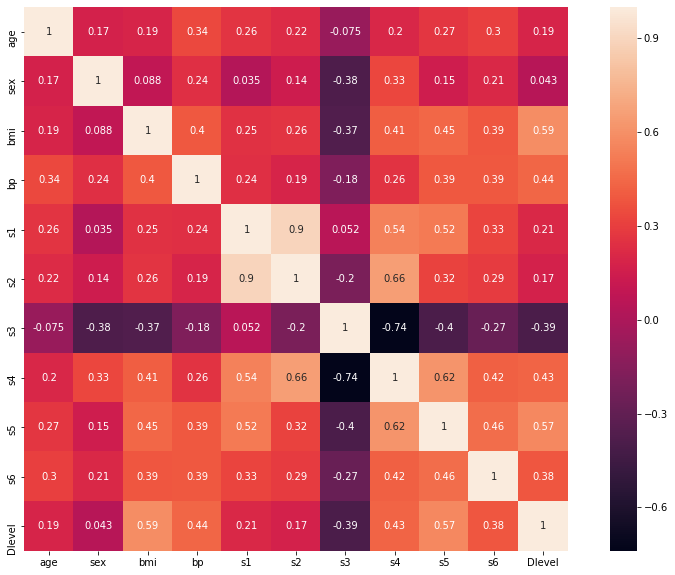

In [13]:
plt.figure(figsize=(15,10))
sb.heatmap(df.corr(),annot=True,square=True)

In [14]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'Dlevel'],
      dtype='object')

### Step 5: Missing value -- No Missing Values

In [15]:
df.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
Dlevel    0
dtype: int64

### Step 6: Outliers
1. When we try to analyse the outliers for this dataset,
2. There are very few outliers



In [16]:
## Count the outliers in the dataset
def outcount(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outcount(df)

age       0
sex       0
bmi       3
bp        0
s1        8
s2        7
s3        7
s4        4
s5        4
s6        9
Dlevel    0
dtype: int64

### Step 7 : Feature Selection/Feature Engineering

<AxesSubplot:>

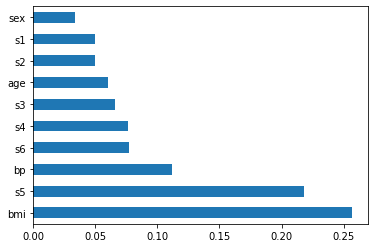

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(df.drop(['Dlevel'],axis=1),df['Dlevel'])
fea=pd.Series(model.feature_importances_,index=df.drop(['Dlevel'],axis=1).columns)
#fea.nlargest(5).plot(kind='barh') getting top 5 
fea.sort_values(ascending=False).plot(kind='barh')

### Step 8 Model Building

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,r2_score

x=df.drop(['Dlevel'],axis=1)
y=df['Dlevel']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

reg=LinearRegression()          
reg=reg.fit(x_train,y_train)
pred=reg.predict(x_test)
mse=mean_squared_error(y_test,pred)
R2=r2_score(y_test,pred)
rmse=np.sqrt(mse)
print('Linear Regression',"R2:",R2,"\nrmse:",rmse)

from sklearn.linear_model import Lasso,Ridge
Las=Lasso(alpha=0.1)
Las=Las.fit(x_train,y_train)
pred_las=Las.predict(x_test)
mse=mean_squared_error(y_test,pred_las)
R2=r2_score(y_test,pred_las)
rmse=np.sqrt(mse)
print('Lasso Regression',"R2:",R2,"\nrmse:",rmse)


from sklearn.linear_model import Lasso,Ridge
rid=Ridge(alpha=0.01)
rid=rid.fit(x_train,y_train)
pred_rid=rid.predict(x_test)
mse=mean_squared_error(y_test,pred_rid)
R2=r2_score(y_test,pred_rid)
rmse=np.sqrt(mse)

print('Ridge Regression',"R2:",R2,"\nrmse:",rmse)

from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=15)
knn=knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
mse=mean_squared_error(y_test,pred_knn)
R2=r2_score(y_test,pred_knn)
rmse=np.sqrt(mse)

print('KNeighborsRegressor',"R2:",R2,"\nrmse:",rmse)


import xgboost as xg 
xgb_r = xg.XGBRegressor(n_estimators = 20) 
xgb_r=xgb_r.fit(x_train,y_train)
pred_xgb_r=xgb_r.predict(x_test)
mse=mean_squared_error(y_test,pred_xgb_r)
R2=r2_score(y_test,pred_xgb_r)
rmse=np.sqrt(mse)

print('XGBRegressor',"R2:",R2,"\nrmse:",rmse)
  

Linear Regression R2: 0.43843604017332705 
rmse: 54.70427480053953
Lasso Regression R2: 0.43099400088105577 
rmse: 55.065561724650095
Ridge Regression R2: 0.43318972642512965 
rmse: 54.9592133474416
KNeighborsRegressor R2: 0.37588202597016784 
rmse: 57.67066990499492
XGBRegressor R2: 0.18384092300624988 
rmse: 65.94912817858695


In [19]:
predictions=reg.predict(x_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
R2=r2_score(y_test,predictions)
print(R2)

MAE: 41.97487568546233
MSE: 2992.557681452944
RMSE: 54.70427480053953
0.43843604017332705


In [20]:

import pickle
# open a file, where you ant to store the data
file = open('simpleRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(reg, file)